In [128]:
# DS L3T13
# US Arrests Capstone II

# PCA & KMeans Clustering & Agglomerative Clustering with Dendrogrograms

In [129]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans

import seaborn as sns
sns.set()
%matplotlib inline

This dataset is a systematic approach for identifying and analyzing patterns and trends in crime.

- The dataset contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. 

- Also provided is the percent of the population living in urban areas. 

In [130]:
# Load the dataset
df = pd.read_csv("USArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Data Cleaning

In [131]:
# Check if there are non-numerical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [132]:
# Statistics summary
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Assault has the highest standard deviation and mean, significantly higher than the other variables. 

In [133]:
# Shape of the data
df.shape

(50, 5)

In [134]:
# Missing data
df.isnull().sum()

# No missing data

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

# Visualisations

<AxesSubplot:xlabel='City'>

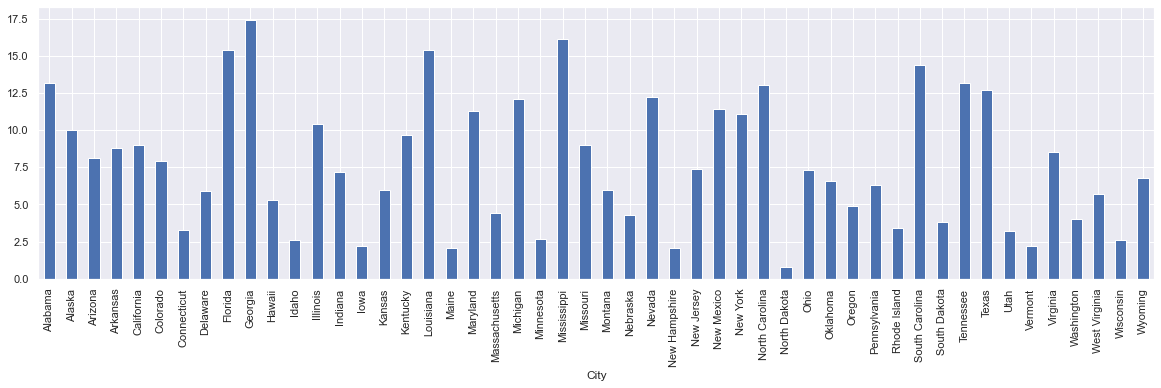

In [135]:
# Murder Rate by City
plt.figure(figsize=(20,5))
df.groupby('City')['Murder'].max().plot(kind='bar')

- The highest Murders are in 9 Georgia and 23 Missisippi. Followed by 8 Florida and 17 Louisana.

- Lowest is in 33 North Dakota and 28 New Hampshire.

<AxesSubplot:xlabel='City'>

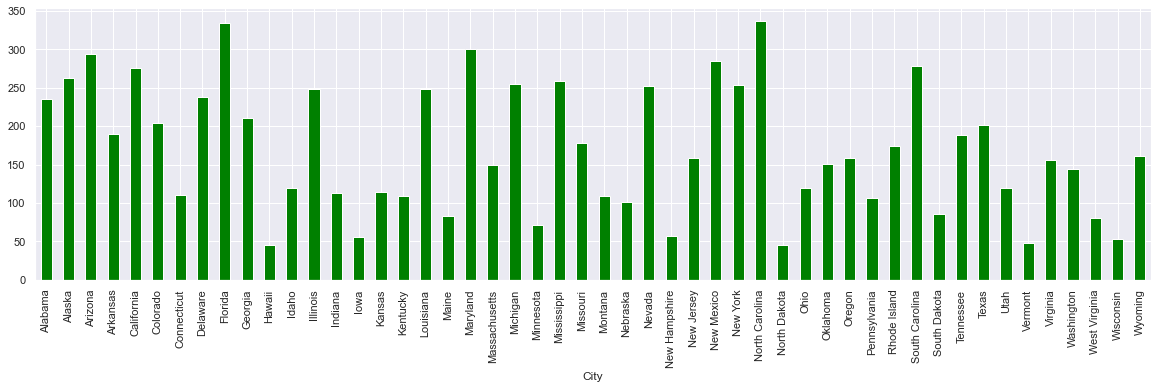

In [136]:
# Assault rate by City
plt.figure(figsize=(20,5))
df.groupby('City')['Assault'].max().plot(kind='bar', color='green') 

- Highest Assaults are in 8 Florida and 32 North California. Followed by 19 Maryland and 2 North Carolina. 

- Lowest is in 10 Hawaii and 33 North Dakota.

<AxesSubplot:xlabel='City'>

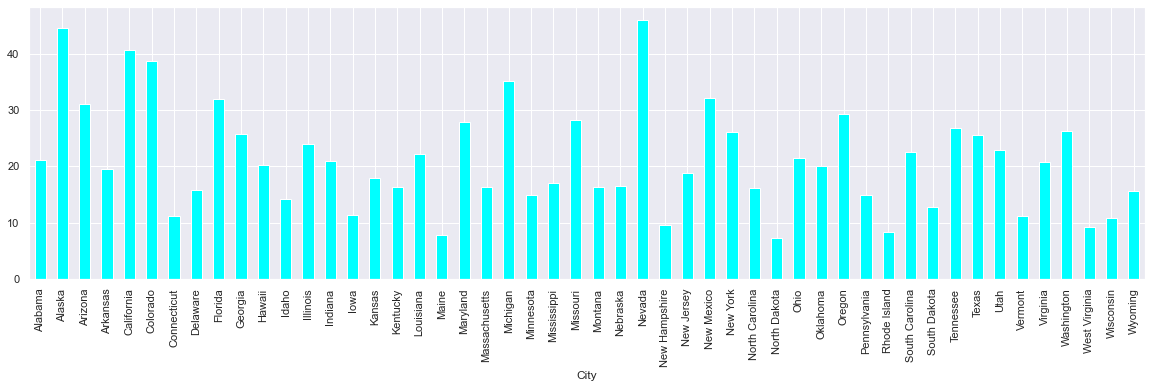

In [137]:
# Rape rates by City
plt.figure(figsize=(20,5))
df.groupby('City')['Rape'].max().plot(kind='bar', color='aqua')

- Highest Rapes are in 27 Nevada and 1 Alaska. Followed by 4 California and 5 Colorado. 

- Lowest is in 33 North Dakota and 18 Maine.

# Correlations

In [138]:
print('Correlation Analysis:')
df.corr()

Correlation Analysis:


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


- There is a significantly higher correlation between Murder and Assault. Rape and Assault & Rape and Murder also have a correlation.

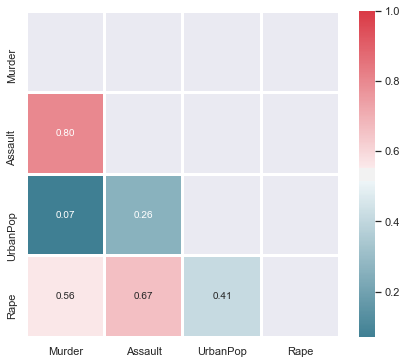

In [139]:
# Correlation HeatMap - All features before PCA
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap
  # Plot figsize
  fig, ax = plt.subplots(figsize=(7, 6))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

# Apply PCA

In [140]:
# Encode categorical feature using LE
df['City'] = LabelEncoder().fit_transform(df['City'])

In [141]:
# Perform Feature Scaling
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.values)

In [142]:
# Perform PCA
from sklearn.decomposition import PCA

# choose number of components to be generated n=3
nr_comps = 4
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

# This is to include the country code  as the rownames in the PC's
pca_df.head()

,0,1,2,3
0,1.431218,0.707694,1.571809,-0.529016
1,2.344861,0.723025,1.394987,1.960770
2,2.156936,-0.991802,0.751082,-0.016037
3,0.297199,0.632516,1.744187,0.021351
4,2.849696,-1.640568,0.179269,0.554437


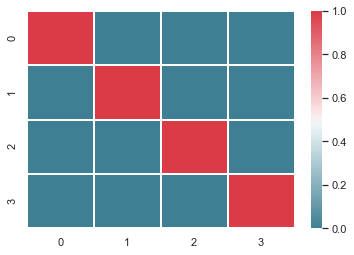

In [143]:
# Heatmap showing correlation after applying PCA
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

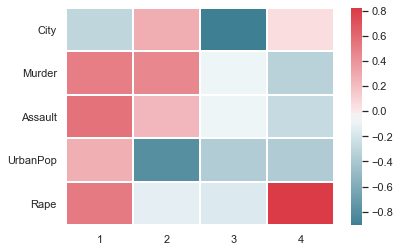

In [144]:
# Post PCA view
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()

ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()

In [145]:
# Check the variance of each PC
pca.explained_variance_ratio_

array([0.52751625, 0.20100993, 0.16624494, 0.07097752])

In [146]:
# Take the mean of all variance of PC to select the threshold
np.mean(pca.explained_variance_ratio_)

0.24143715902059615

In [147]:
# Recreate PCA object with final PC count 
finalFeatures = pca.transform(X)
finalFeatures

array([[ 1.43121848e+00,  7.07693535e-01,  1.57180859e+00,
        -5.29015972e-01],
       [ 2.34486149e+00,  7.23025213e-01,  1.39498721e+00,
         1.96077010e+00],
       [ 2.15693554e+00, -9.91802247e-01,  7.51081771e-01,
        -1.60365964e-02],
       [ 2.97199012e-01,  6.32516232e-01,  1.74418731e+00,
         2.13510525e-02],
       [ 2.84969629e+00, -1.64056844e+00,  1.79268718e-01,
         5.54436817e-01],
       [ 1.86024847e+00, -1.19033638e+00,  5.73562403e-01,
         1.04199453e+00],
       [-9.09514378e-01, -1.52452481e+00,  1.19142233e+00,
        -7.28859776e-01],
       [ 4.09268396e-01, -6.49356566e-01,  9.99492163e-01,
        -7.94136018e-01],
       [ 3.21418287e+00,  1.33973356e-02,  1.81048740e-01,
        -6.01023841e-01],
       [ 1.86545999e+00,  1.09607279e+00,  8.20988350e-01,
        -3.73028231e-01],
       [-5.63343696e-01, -1.85855454e+00,  6.55406647e-01,
         1.61068040e-04],
       [-1.28752030e+00, -2.30099581e-01,  1.41406316e+00,
      

# Clustering

2 Clustering techniques and analysis

# 1. KMeans

Scatter plots with the different combinations of the variables

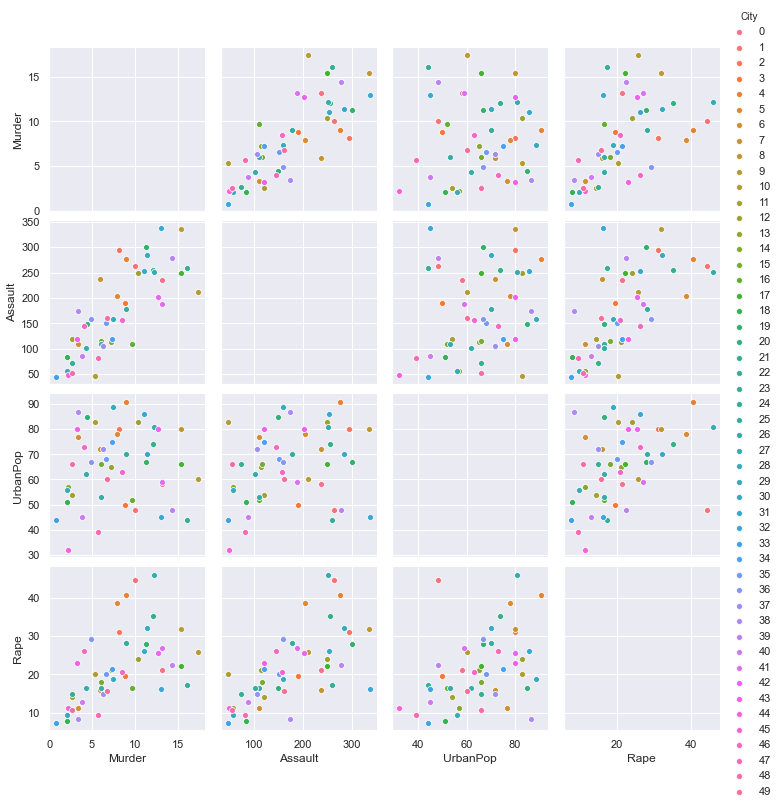

In [118]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Pairplot with hue Species
sns.pairplot(df, hue ='City') 

A Scree plot is a plot between WCSS (Within cluster sum of squares) and number of clusters. Without sound domain knowledge or in the scenarios with unclear motives, the scree plots help us decide the number of clusters to specify

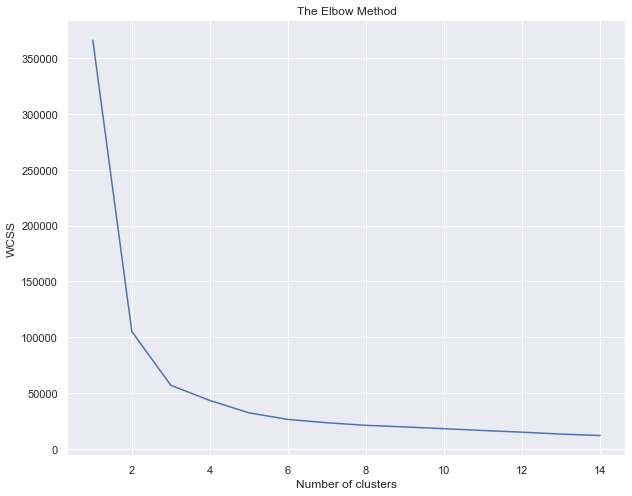

In [119]:
# Scree Plot
plt.figure(figsize=(10, 8))
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    
    # criterion based on which K-means clustering works
    wcss.append(kmeans.inertia_) 
    
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### The scree plot levels off at k=4 to determine the clusters. Fit the dataset with k=4 and a random seed.

In [120]:
# Build the model and Fit K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

y_kmeans

array([0, 0, 0, 3, 0, 3, 1, 0, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 3, 0,
       2, 0, 3, 1, 1, 0, 2, 3, 0, 0, 0, 2, 1, 3, 3, 1, 3, 0, 2, 3, 3, 1,
       2, 3, 3, 2, 2, 3])

In [121]:
# Start the cluster with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)

# Adding the cluster to the data set
df['cluster'] = cluster

In [122]:
# Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(), 2))  # rounding off to two decimals
kmeans_mean_cluster

,City,Murder,Assault,UrbanPop,Rape
cluster,,,,,
1,17.06,11.81,272.56,68.31,28.38
2,22.60,5.59,112.40,65.60,17.27
3,30.40,2.95,62.70,53.90,11.51
4,30.14,8.21,173.29,70.64,22.84


In [123]:
# States in cluster 1
df[df['cluster']==1]

,City,Murder,Assault,UrbanPop,Rape,cluster
0,0,13.2,236,58,21.2,1
1,1,10.0,263,48,44.5,1
2,2,8.1,294,80,31.0,1
4,4,9.0,276,91,40.6,1
7,7,5.9,238,72,15.8,1
8,8,15.4,335,80,31.9,1
12,12,10.4,249,83,24.0,1
17,17,15.4,249,66,22.2,1
19,19,11.3,300,67,27.8,1
21,21,12.1,255,74,35.1,1


The Silhouette Score can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [124]:
# Silhouette score
kmeans = KMeans(n_clusters = 4,  random_state = 42)
y_kmeans = kmeans.fit_predict(X)

silhouette_score = round(silhouette_score(X, y_kmeans, metric='euclidean'), 2)

In [125]:
silhouette_score

0.22

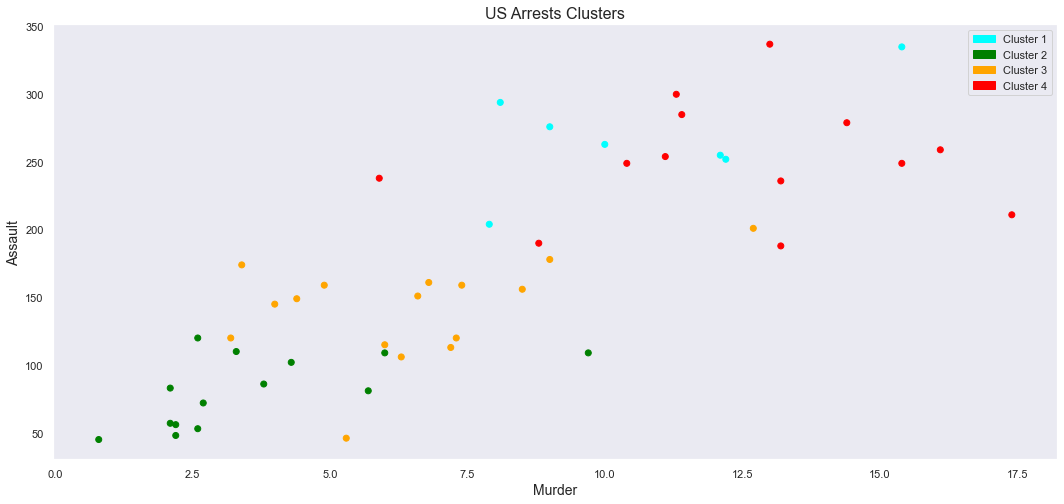

In [126]:
# Plot Clusters
import matplotlib.patches as mpatches

plt.figure(figsize=(18, 8))

colormap = np.array(['aqua', 'green','orange', 'red'])
pop_a = mpatches.Patch(color='aqua', label='Cluster 1')
pop_b = mpatches.Patch(color='green', label='Cluster 2')
pop_c = mpatches.Patch(color='orange', label='Cluster 3')
pop_d = mpatches.Patch(color='red', label='Cluster 4')

plt.scatter(df['Murder'], df['Assault'], c=colormap[y_kmeans] )
plt.legend(handles=[pop_a, pop_b, pop_c, pop_d])

plt.xlabel('Murder', fontsize=14) 
plt.ylabel('Assault', fontsize=14)                                                 

plt.title('US Arrests Clusters', fontsize=16)
plt.grid() 

In [127]:
# Download clusters into a CSV file
from IPython.display import HTML
import base64

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# 2. Dendograms & Agglomerative Hierarchical Clustering

In [148]:
# Import Clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

- Select two features from the data, scale the data.

In [149]:
# Select useful features
X = df[['City', 'Murder']].values.reshape(-1, 1)  

# Check the data shape
print('Data size:')
print(X.shape)

Data size:
(100, 1)


In [150]:
# Perform Feature Scaling
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.values)

# Dendrograms

A dendrogram contains two kinds of information. Firstly, it shows each merge that
was performed. Secondly, the length of the vertical lines show the distances
(Euclidean distance or whatever distance measure was specified) between the
merged clusters

A) Average & Complete Linkage using Minkowski

Text(0, 0.5, 'Minkowski distances')

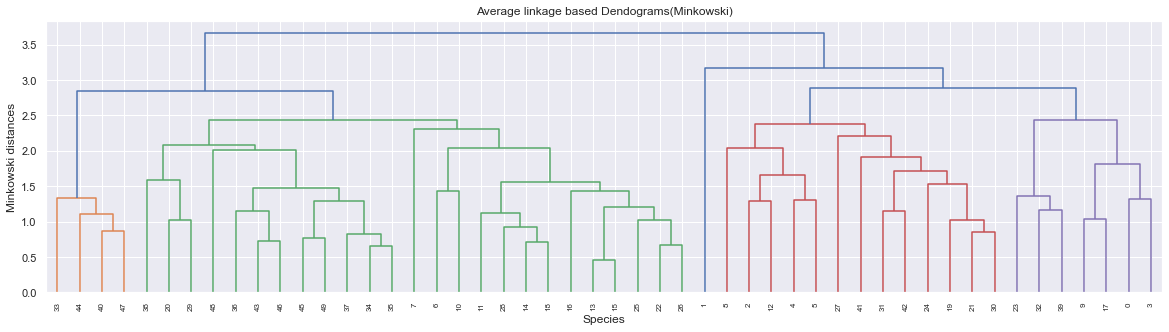

In [151]:
# Plot Average linked Dendrogram
plt.figure(figsize=(20, 5))
plt.title("Average linkage based Dendograms(Minkowski)")  
dend = dendrogram(linkage(X, method='average', metric='minkowski'))

plt.xlabel('Species')
plt.ylabel('Minkowski distances')

Text(0, 0.5, 'Minkowski distances')

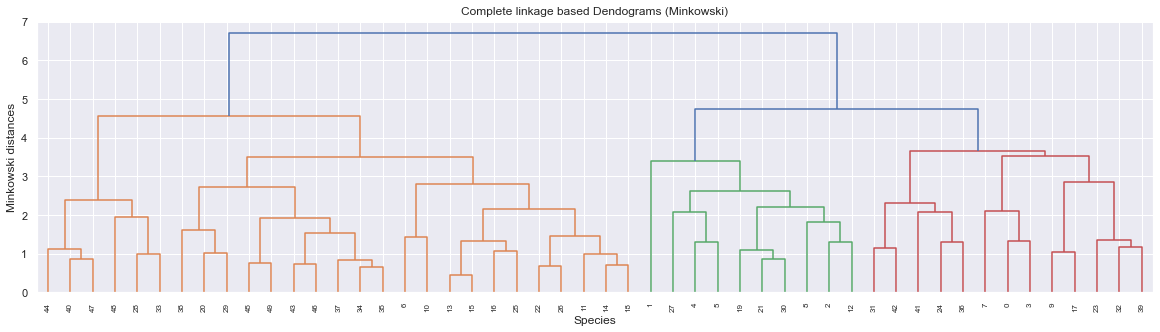

In [152]:
# Plot Complete linked Dendrogram
plt.figure(figsize=(20,5))
plt.title("Complete linkage based Dendograms (Minkowski)")  
dend = dendrogram(linkage(X, method='complete', metric='minkowski'))

plt.xlabel('Species')
plt.ylabel('Minkowski distances')

B) Average & Complete Linkage using Euclidean

Text(0, 0.5, 'Euclidean distances')

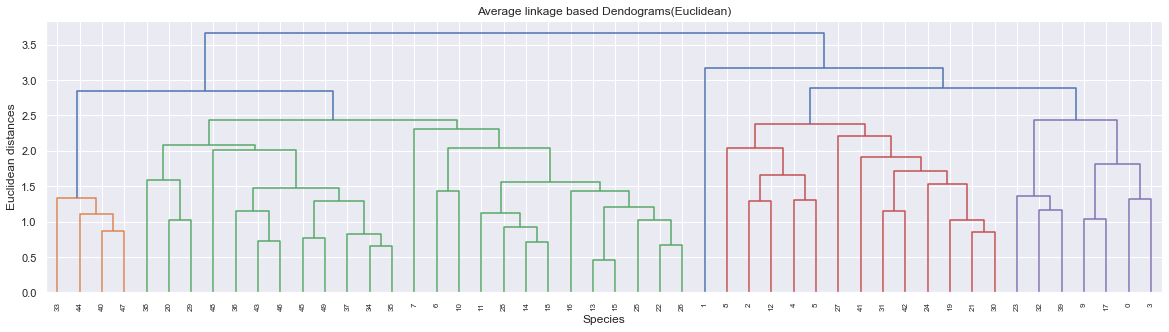

In [153]:
# Plot Average linked Dendrogram
plt.figure(figsize=(20, 5))
plt.title("Average linkage based Dendograms(Euclidean)")  
dend = dendrogram(linkage(X, method='average', metric="euclidean"))

plt.xlabel('Species')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Cityblock distances')

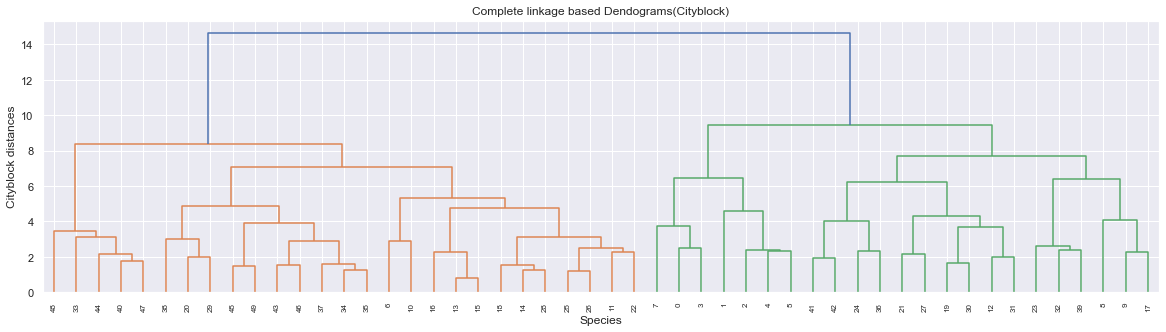

In [154]:
# Plot Complete linked Dendrogram
plt.figure(figsize=(20, 5))
plt.title("Complete linkage based Dendograms(Cityblock)")  
dend = dendrogram(linkage(X, method='complete', metric="cityblock"))

plt.xlabel('Species')
plt.ylabel('Cityblock distances')

Selection of the Minkowski Average Dendrogram.

- Choose a fixed number of clusters based on the dendrogram of your choice

- Run agglomerative hierarchical clustering with that number of clusters (and the linkage method and distance metric used for that dendrogram)

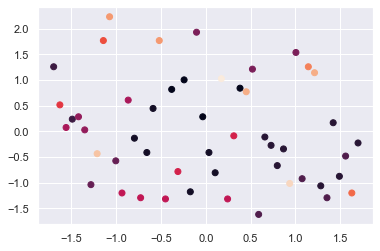

In [155]:
# Chose Average Linkage - Metric Minkowski
# Clusters K=20
K=20

# Agglomerative clustering
minkowski_cluster = AgglomerativeClustering(n_clusters=K, affinity='minkowski', linkage='average')
minkowski_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=minkowski_cluster.labels_)

In [156]:
# Reshape X
X = X.reshape(-1, 1)
X.shape

(250, 1)

In [157]:
# Silhouette score to verify clusters
# Silhouette score using Minkowski metric
from sklearn.metrics import accuracy_score, silhouette_score
silhouette_score = silhouette_score(X, labels=minkowski_cluster.fit_predict(X), metric='minkowski')

In [158]:
silhouette_score

0.5444099632445761